In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Генерирование гауссовских случайных процессов

## 1. Генерирование с помощью многомерного нормального вектора

Если вам нужно сгенерировать реализацию гауссовского случайного процесса $X = (X_t)_{t \geqslant 0}$ фиксированной известной (и не слишком большой) длины $n$, можно воспользоваться тем фактом, что конечномерные распределения гауссовского случайного процесса являются нормальными, а его моменты (математическое ожидание $m(t)$ и ковариационная функция $R(t_1, t_2)$ известны. В этом случае достаточно рассмотреть $n$ моментов времени $t_1, \ldots, t_n$ и сгенерировать $n$-мерный случайный гауссовский вектор с нужными математическим ожиданием $m(t_1), \ldots, m(t_n)$ и ковариационной матрицей $\Sigma = R(t_i, t_i)$.

Заметим, что если $Z$ - стандартно нормально распределенная случайная величина, т.е. $Z \sim N(0, 1)$, то ее линейное преобразование $X = \mu + \sigma Z$ имеет также нормальное распределение, причем $X \sim N(\mu, \sigma^2)$. 

Аналогичное соотношение существует и для многомерных нормальных векторов. А именно, пусть $\mathbf{Z} = (Z_1, \ldots, Z_n) \sim N(0, \mathbf{I})$, где $\mathbf{I} = \mathrm{diag}(1, \ldots, 1)$ - единичная матрица. Тогда случайный вектор $\mathbf{X} = \mathbf{\mu} + \mathbf{C} \mathbf{Z}$ имеет нормальное $N(\mathbf{\mu}, \mathbf{\Sigma})$ распределение, где $\mathbf{\mu} = (\mu_1, \ldots, \mu_n)$ - желаемый вектор средних, а матрицы $\mathbf{C}$ и $\mathbf{\Sigma}$ связаны соотношениями $\mathbf{\Sigma} = \mathbf{C} \mathbf{C}^T$. Последнее соотношение называется разложением Холецкого положительно полуопределенной $n \times n$ матрицы $\mathbf{\Sigma}$, причем $n \times n$  матрица $\mathbf{C}$ оказывается нижнетреугольной.

Поэтому, чтобы сгенерировать многомерный нормальный вектор, можно поступить следующим способом. Сгенерируем $\mathbf{Z} = (Z_1, \ldots, Z_n) \sim N(0, \mathbf{I})$, вычислим $\mathbf{C}$ и положим $\mathbf{X} = \mathbf{\mu} + \mathbf{C} \mathbf{Z}$.

### 1.1. Винеровский процесс

Рассмотрим этот подход на примере простого броуновского движения $B = (B_t)_{t \geqslant 0}$. Для этого процесса $\mathrm{E} B_t = 0$, $R(s, t) = \mathrm{E} [B_s B_t] = \mathrm{min}(s, t)$. 

Вычислим вектор математических ожиданий и ковариационную матрицу для $t_i = \Delta i, i = 0, \ldots, 1000, \Delta = 10^{-2}$.

**Задание 1.** Сгенерировать траекторию обыкновенного броуновского движения $B_t$ длиной 1000, используя разложение Холецкого (np.linalg.cholesky) ковариационной матрицы этого процесса. 

In [5]:
# Helper functions -- reuse to implement other random processes
def compute_bm_mean(timestamps):
    return np.zeros(len(timestamps))

def compute_bm_cov(timestamps):
    n = len(timestamps)
    R = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            R[i, j] = np.min([timestamps[i], timestamps[j]])
    return R

In [9]:
# create mean vector and covariance matrix
timestamps = np.linspace(1, 11, 1000)
mean_bm = compute_bm_mean(timestamps)
cov_bm = compute_bm_cov(timestamps)

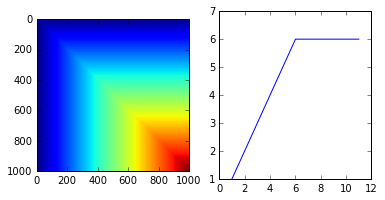

In [10]:
figure(figsize=(6, 3))
subplot(1, 2, 1)
imshow(cov_bm, interpolation='nearest')
subplot(1, 2, 2)
plot(timestamps, cov_bm[500, :])

In [12]:
# generate the sample path of the Brownian motion
### your code here
C = np.linalg.cholesky(cov_bm)
Z = np.random.normal(size=1000)
X = mean_bm + np.dot(C, Z)

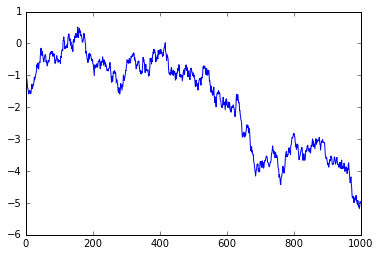

In [13]:
# plot the increments of the Brownian motion
# plot the sample path of the Brownian motion
### your code here
plot(X)

**Задание 2.** Сгенерировать траекторию броуновского движения со сносом $\mu t + B_t$, используя разложение Холецкого (np.linalg.cholesky) ковариационной матрицы этого процесса. Использовать несколько различных значений $\mu$.

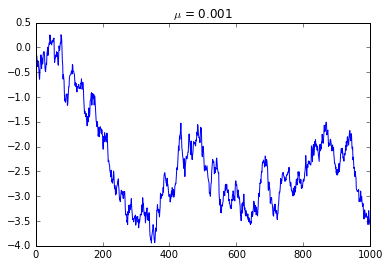

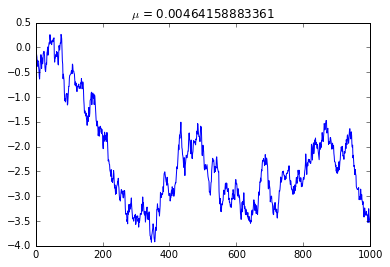

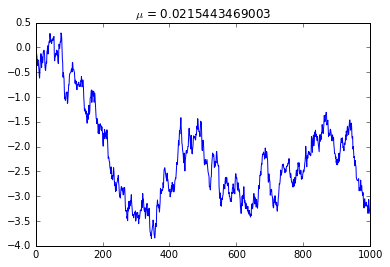

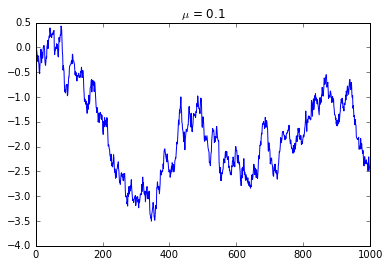

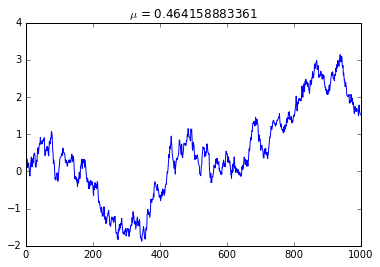

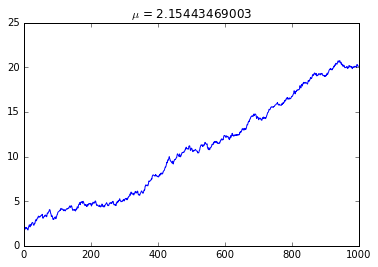

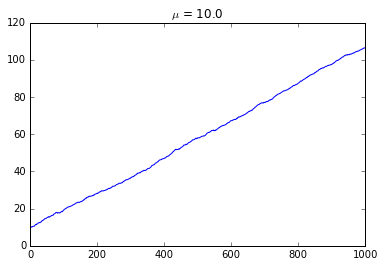

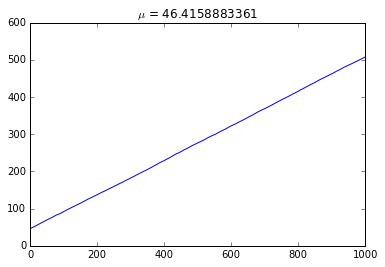

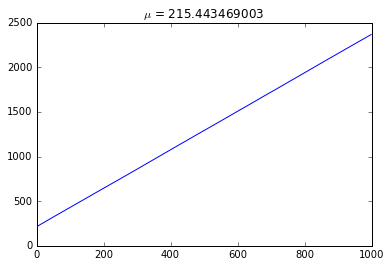

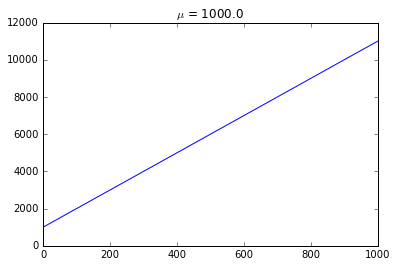

In [20]:
C = np.linalg.cholesky(cov_bm)
Z = np.random.normal(size=1000)
mu = np.logspace(-3, 3, 10)
for m in mu:
    X = m*timestamps + np.dot(C, Z)
    plt.figure()
    plt.plot(X)
    plt.title('$\mu$ = %s'%str(m))

### 1.2. Фрактальное броуновское движение


Стандартное фрактальное броуновское движение $B^H = (B^H_t)_{t \geqslant 0}$
на $[0,T]$ с параметром Хёрста $H \in (0,1)$ -
это гауссовский процесс с непрерывными траекториями такой, что
$$
B^H_0 = 0,
\qquad
\mathrm{E} B^H_t = 0,
\qquad
\mathrm{E} [B^H_t B^H_s] = \frac{1}{2}
    \big(|t|^{2H} + |s|^{2H} - |t - s|^{2H}\big).
$$
В случае, когда $H=\frac{1}{2}$, фрактальное броуновское движение является
обыкновенным броуновским движением, в случае же $H\neq\frac{1}{2}$ процесс $B^H$ является некоторым гауссовским процессом.

**Задание 3.** Сгенерировать траекторию фрактального броуновского движения $B^H_t$, используя разложение Холецкого (np.linalg.cholesky) ковариационной матрицы этого процесса. Использовать несколько различных значений $H \in (0, 1)$.

In [31]:
def compute_fbm_matrix(timestamps, H):
    ### your code here
    n = len(timestamps)
    R = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            R[i, j] = 1/2*(np.abs(timestamps[i])**(2*H)+np.abs(timestamps[j])**(2*H)-np.abs(timestamps[i] - timestamps[j])**(2*H))
    return R

Вначале убедимся, что траектория fBm при $H = 1/2$ выглядит похожей на траекторию обыкновенного броуновского движения, а его ковариационная матрица равна ковариационной матрице обыкновенного броуновского движения.

In [32]:
# compute the covariance of the fractional brownian motion for H = 1/2
timestamps = np.linspace(1, 11, 1000)
mean_bm = compute_bm_mean(timestamps)
cov_fbm = compute_fbm_matrix(timestamps, 1/2)

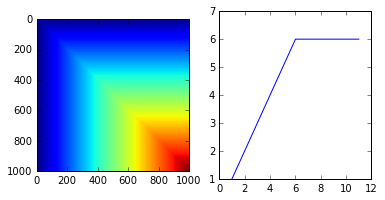

In [33]:
figure(figsize=(6, 3))
subplot(1, 2, 1)
imshow(cov_fbm, interpolation='nearest')
subplot(1, 2, 2)
plot(timestamps, cov_fbm[500, :])

In [34]:
# compute the sample path of the fractional brownian motion for H = 1/2
C = np.linalg.cholesky(cov_fbm)
Z = np.random.normal(size=1000)
X = mean_bm + np.dot(C, Z)

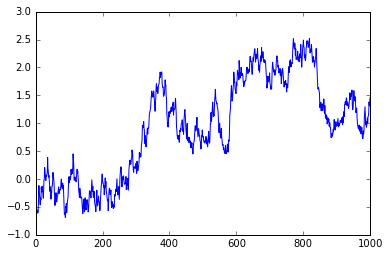

In [35]:
# plot the increments of the fractional Brownian motion
# plot the sample path of the fractional Brownian motion
### your code here
plot(X)

Теперь посмотрим, что происходит с процессом fBM при $H < 1/2$.

In [36]:
# compute the covariance of the fractional brownian motion for 0 < H < 1/2
timestamps = np.linspace(1, 11, 1000)
cov_fbm = compute_fbm_matrix(timestamps, 1/4)

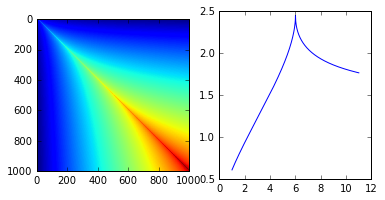

In [37]:
figure(figsize=(6, 3))
subplot(1, 2, 1)
imshow(cov_fbm, interpolation='nearest')
subplot(1, 2, 2)
plot(timestamps, cov_fbm[500, :])

In [38]:
# compute the sample path of the fractional brownian motion for 0 < H < 1/2
### your code here
C = np.linalg.cholesky(cov_fbm)
Z = np.random.normal(size=1000)
X = mean_bm + np.dot(C, Z)

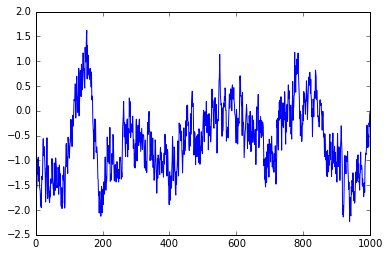

In [39]:
# plot the increments of the fractional Brownian motion
# plot the sample path of the fractional Brownian motion
### your code here
plot(X)

Рассмотрим еще случай $H > 1/2$.

In [40]:
# compute the sample path of the fractional brownian motion for 1/2 < H < 1
### your code here
timestamps = np.linspace(1, 11, 1000)
mean_bm = compute_bm_mean(timestamps)
cov_fbm = compute_fbm_matrix(timestamps, 2/3)

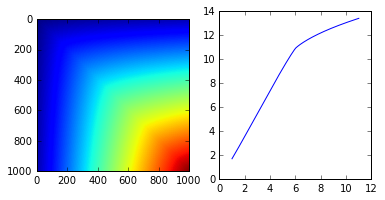

In [41]:
figure(figsize=(6, 3))
subplot(1, 2, 1)
imshow(cov_fbm, interpolation='nearest')
subplot(1, 2, 2)
plot(timestamps, cov_fbm[500, :])

In [42]:
# compute the sample path of the fractional brownian motion for 1/2 < H < 1
### your code here
C = np.linalg.cholesky(cov_fbm)
Z = np.random.normal(size=1000)
X = mean_bm + np.dot(C, Z)

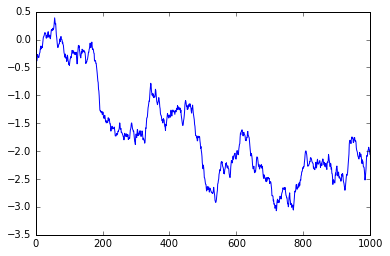

In [43]:
# plot the increments of the fractional Brownian motion
# plot the sample path of the fractional Brownian motion
### your code here
plot(X)

Еще раз отобразим траектории fBm при различных увеличивающихся $H$.

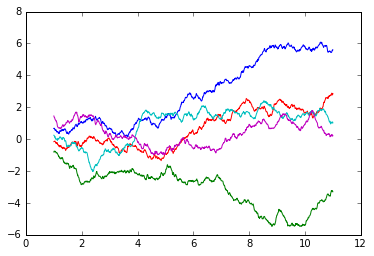

In [46]:
# generate sample path driven by the same driving BM process

for H in [0.1, 0.3, 0.5, 0.7, 0.9]:
    cov_fbm = compute_fbm_matrix(timestamps, H)
    Z = np.random.normal(size=1000)
    X = mean_bm + np.dot(C, Z)
    plot(timestamps, X)

### 1.3. Процесс Орнштейна-Уленбека

Процесс Орнштейна-Уленбека - это гауссовский процесс $X = (X_t)_{t \geqslant 0}$ с непрерывными траекториями такой, что 
$$
X_t = e^{-t} B_{e^{2t}},
$$
где $B = (B_t)_{t \geqslant 0}$ - обыкновенное броуновское движение.

Легко показать, что $\mathrm{E} X_t = 0$, $\mathrm{E} [X_s X_t] = e^{-|s - t|}$.

**Задание 4.** Сгенерировать траекторию процесса Орнштейна-Уленбека $B^H_t$, используя разложение Холецкого (np.linalg.cholesky) ковариационной матрицы этого процесса.

In [47]:
def compute_ou_cov(timestamps):
    n = len(timestamps)
    R = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            R[i, j] = np.exp(np.abs(timestamps[i] - timestamps[j]))
    return R

In [48]:
# compute the covariance of the OU process
### your code here
cov_ou = compute_ou_cov(timestamps)

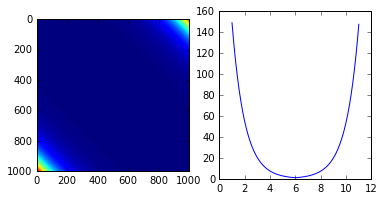

In [49]:
figure(figsize=(6, 3))
subplot(1, 2, 1)
imshow(cov_ou, interpolation='nearest')
subplot(1, 2, 2)
plot(timestamps, cov_ou[500, :])

In [ ]:
# compute the sample path of the OU process
### your code here

In [ ]:
# plot the increments of the fractional Brownian motion
# plot the sample path of the fractional Brownian motion
### your code here